In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [4]:
test_df['Survived'] = -888

In [5]:
df = pd.concat((train_df, test_df), axis=0)

In [6]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [7]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [8]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [9]:
df.Embarked.fillna('C', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [11]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print median_fare

8.05


In [12]:
df.Fare.fillna(median_fare, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [14]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


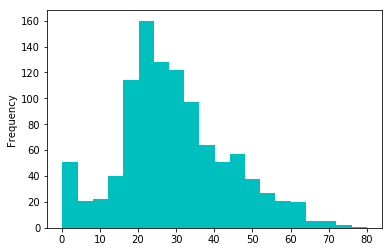

In [15]:
%matplotlib inline
df.Age.plot(kind='hist', bins=20, color='c')

In [16]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

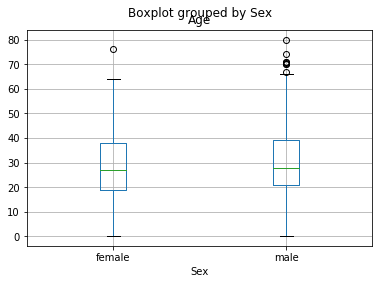

In [18]:
df[df.Age.notnull()].boxplot('Age', 'Sex')

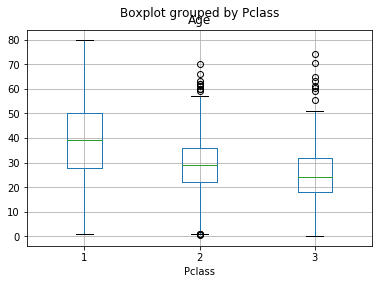

In [19]:
df[df.Age.notnull()].boxplot('Age', 'Pclass')

In [20]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [21]:
def get_title(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [22]:
df.Name.map(lambda x: get_title(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
8       master
9          mrs
10         mrs
11        miss
12        miss
13          mr
14          mr
15        miss
16         mrs
17      master
18          mr
19         mrs
20         mrs
21          mr
22          mr
23        miss
24          mr
25        miss
26         mrs
27          mr
28          mr
29        miss
30          mr
         ...  
1280        mr
1281    master
1282        mr
1283       mrs
1284    master
1285        mr
1286        mr
1287       mrs
1288        mr
1289       mrs
1290        mr
1291        mr
1292      miss
1293        mr
1294      miss
1295        mr
1296        mr
1297        mr
1298        mr
1299        mr
1300      miss
1301      miss
1302      miss
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [23]:
df.Name.map(lambda x: get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [28]:
def get_title(name):
    title_group = {
        'mr' : 'Mr', 
        'mrs' : 'Mrs', 
        'miss' : 'Miss', 
        'master' : 'Master', 
        'don' : 'Ser', 
        'rev' : 'Ser', 
        'dr' : 'Officer', 
        'mme' : 'Mrs', 
        'ms' : 'Mrs',
        'major' : "Officer", 
        'lady' : 'Lady', 
        'sir' : 'Sir', 
        'mlle' : 'Miss', 
        'col' : 'Officer', 
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Sir', 
        'dona' : 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [29]:
df['Title'] = df.Name.map(lambda x: get_title(x))

In [31]:
df.Title

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
6           Mr
7           Mr
8       Master
9          Mrs
10         Mrs
11        Miss
12        Miss
13          Mr
14          Mr
15        Miss
16         Mrs
17      Master
18          Mr
19         Mrs
20         Mrs
21          Mr
22          Mr
23        Miss
24          Mr
25        Miss
26         Mrs
27          Mr
28          Mr
29        Miss
30          Mr
         ...  
1280        Mr
1281    Master
1282        Mr
1283       Mrs
1284    Master
1285        Mr
1286        Mr
1287       Mrs
1288        Mr
1289       Mrs
1290        Mr
1291        Mr
1292      Miss
1293        Mr
1294      Miss
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300      Miss
1301      Miss
1302      Miss
1303       Mrs
1304      Miss
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 1309, dtype: object

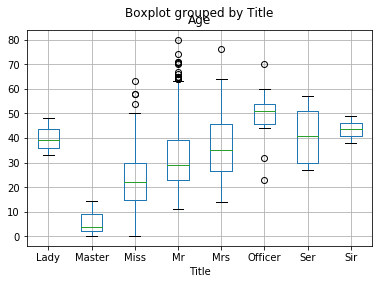

In [32]:
df[df.Age.notnull()].boxplot('Age', 'Title')

In [36]:
title_age_median = df.groupby('Title').Age.transform('median')
title_age_median

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
6       29.0
7       29.0
8        4.0
9       35.0
10      35.0
11      22.0
12      22.0
13      29.0
14      29.0
15      22.0
16      35.0
17       4.0
18      29.0
19      35.0
20      35.0
21      29.0
22      29.0
23      22.0
24      29.0
25      22.0
26      35.0
27      29.0
28      29.0
29      22.0
30      29.0
        ... 
1280    29.0
1281     4.0
1282    29.0
1283    35.0
1284     4.0
1285    29.0
1286    29.0
1287    35.0
1288    29.0
1289    35.0
1290    29.0
1291    29.0
1292    22.0
1293    29.0
1294    22.0
1295    29.0
1296    29.0
1297    29.0
1298    29.0
1299    29.0
1300    22.0
1301    22.0
1302    22.0
1303    35.0
1304    22.0
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64

In [38]:
df.Age.fillna(title_age_median, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


SyntaxError: invalid syntax (<ipython-input-40-02db47e578d6>, line 1)